Analise de dados para finanças


In [72]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_datareader import data
import yfinance as yf
from scipy import stats
from pandas_datareader import data

In [7]:
# Criando variável com empresas. BOVA é para fazer a comparação dos ganhos.
açoes = ['EMBR3.SA', 'VALE3.SA', 'PETR3.SA', 'BBAS3.SA', 'GGBR3.SA', 'BOVA11.SA']

In [8]:
# Buscando os valores das ações para criar um DataFrame
bovespa = pd.DataFrame()
for i in açoes:
  bovespa[i] = yf.download(i, start='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
# Observando novo DataFrame
bovespa.head()

,EMBR3.SA,VALE3.SA,PETR3.SA,BBAS3.SA,GGBR3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,24.850000,21.280001,9.00,22.650000,7.857142,47.259998
2015-01-05,24.299999,20.959999,8.27,22.180000,7.028571,46.320000
2015-01-06,23.860001,21.799999,8.06,22.490000,7.571428,46.580002
2015-01-07,23.680000,22.600000,8.45,23.480000,8.123809,48.150002
2015-01-08,23.000000,22.840000,9.02,23.559999,7.866666,48.509998


In [10]:
# Observando numero de linhas e colunas
bovespa.shape

(2129, 6)

In [11]:
# renomeando as colunas para facilitar a identificação
bovespa = bovespa.rename(columns = {'EMBR3.SA': 'EMBRAER', 'VALE3.SA': 'VALE', 'PETR3.SA': 'PETROBRAS',
                                    'BBAS3.SA': 'BDOBRASIL', 'GGBR3.SA': 'GERDAU', 'BOVA11.SA': 'BOVA'})

In [12]:
# Conferindo a mudança
bovespa.head()

,EMBRAER,VALE,PETROBRAS,BDOBRASIL,GERDAU,BOVA
Date,,,,,,
2015-01-02,24.850000,21.280001,9.00,22.650000,7.857142,47.259998
2015-01-05,24.299999,20.959999,8.27,22.180000,7.028571,46.320000
2015-01-06,23.860001,21.799999,8.06,22.490000,7.571428,46.580002
2015-01-07,23.680000,22.600000,8.45,23.480000,8.123809,48.150002
2015-01-08,23.000000,22.840000,9.02,23.559999,7.866666,48.509998


In [13]:
# Informações
bovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2129 entries, 2015-01-02 to 2023-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EMBRAER    2129 non-null   float64
 1   VALE       2129 non-null   float64
 2   PETROBRAS  2129 non-null   float64
 3   BDOBRASIL  2129 non-null   float64
 4   GERDAU     2129 non-null   float64
 5   BOVA       2102 non-null   float64
dtypes: float64(6)
memory usage: 116.4 KB


In [14]:
# Verificando valores nulos
bovespa.isna().any()

EMBRAER      False
VALE         False
PETROBRAS    False
BDOBRASIL    False
GERDAU       False
BOVA          True
dtype: bool

In [15]:
# Verificando a quantidade de valores nulos em cada variável
bovespa.isnull().sum()

EMBRAER       0
VALE          0
PETROBRAS     0
BDOBRASIL     0
GERDAU        0
BOVA         27
dtype: int64

In [16]:
# Calculando a % de valores ausente na variável BOVA
bovespa.BOVA.isnull().mean()*100

1.2682010333489901

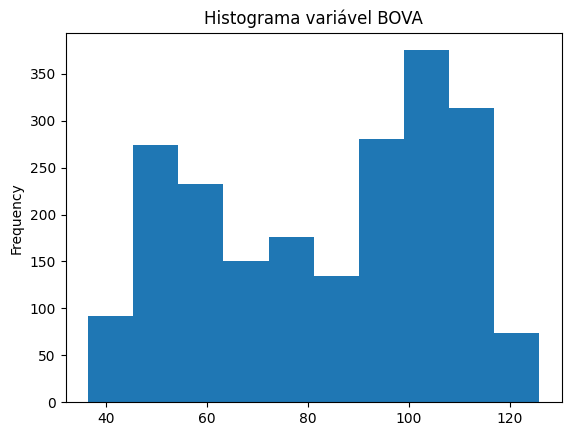

In [17]:
# Verificando o histograma da variável BOVA
bovespa.BOVA.plot(kind = 'hist')
plt.title('Histograma variável BOVA')
plt.show()

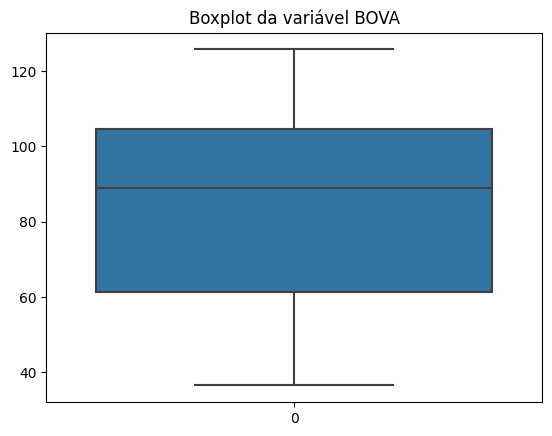

In [18]:
# Verificando o boxplot da variável BOVA
sns.boxplot(bovespa.BOVA)
plt.title('Boxplot da variável BOVA')
plt.show()

In [19]:
# Os dados não estão simétricos, por isso vamos imputar a mediana
# Calculando a mediana
bovespa.BOVA.median()

88.83000183105469

In [20]:
# Substituindo os dados nulos pela mediana
bovespa.BOVA.fillna("88.830", inplace  = True)

In [21]:
# Conferindo no banco de dados
bovespa.isnull().sum()

EMBRAER      0
VALE         0
PETROBRAS    0
BDOBRASIL    0
GERDAU       0
BOVA         0
dtype: int64

In [22]:
# Salvando o banco de dados
bovespa.to_csv('bovespa_portfolio.csv')

In [29]:
# Carregando o banco de dados csv salvo
bovespa2 = pd.read_csv('/content/bovespa_portfolio.csv')

In [31]:
# Conferindo os dados
bovespa2.head()

,Date,EMBRAER,VALE,PETROBRAS,BDOBRASIL,GERDAU,BOVA
0,2015-01-02,24.850000,21.280001,9.00,22.650000,7.857142,47.259998
1,2015-01-05,24.299999,20.959999,8.27,22.180000,7.028571,46.320000
2,2015-01-06,23.860001,21.799999,8.06,22.490000,7.571428,46.580002
3,2015-01-07,23.680000,22.600000,8.45,23.480000,8.123809,48.150002
4,2015-01-08,23.000000,22.840000,9.02,23.559999,7.866666,48.509998


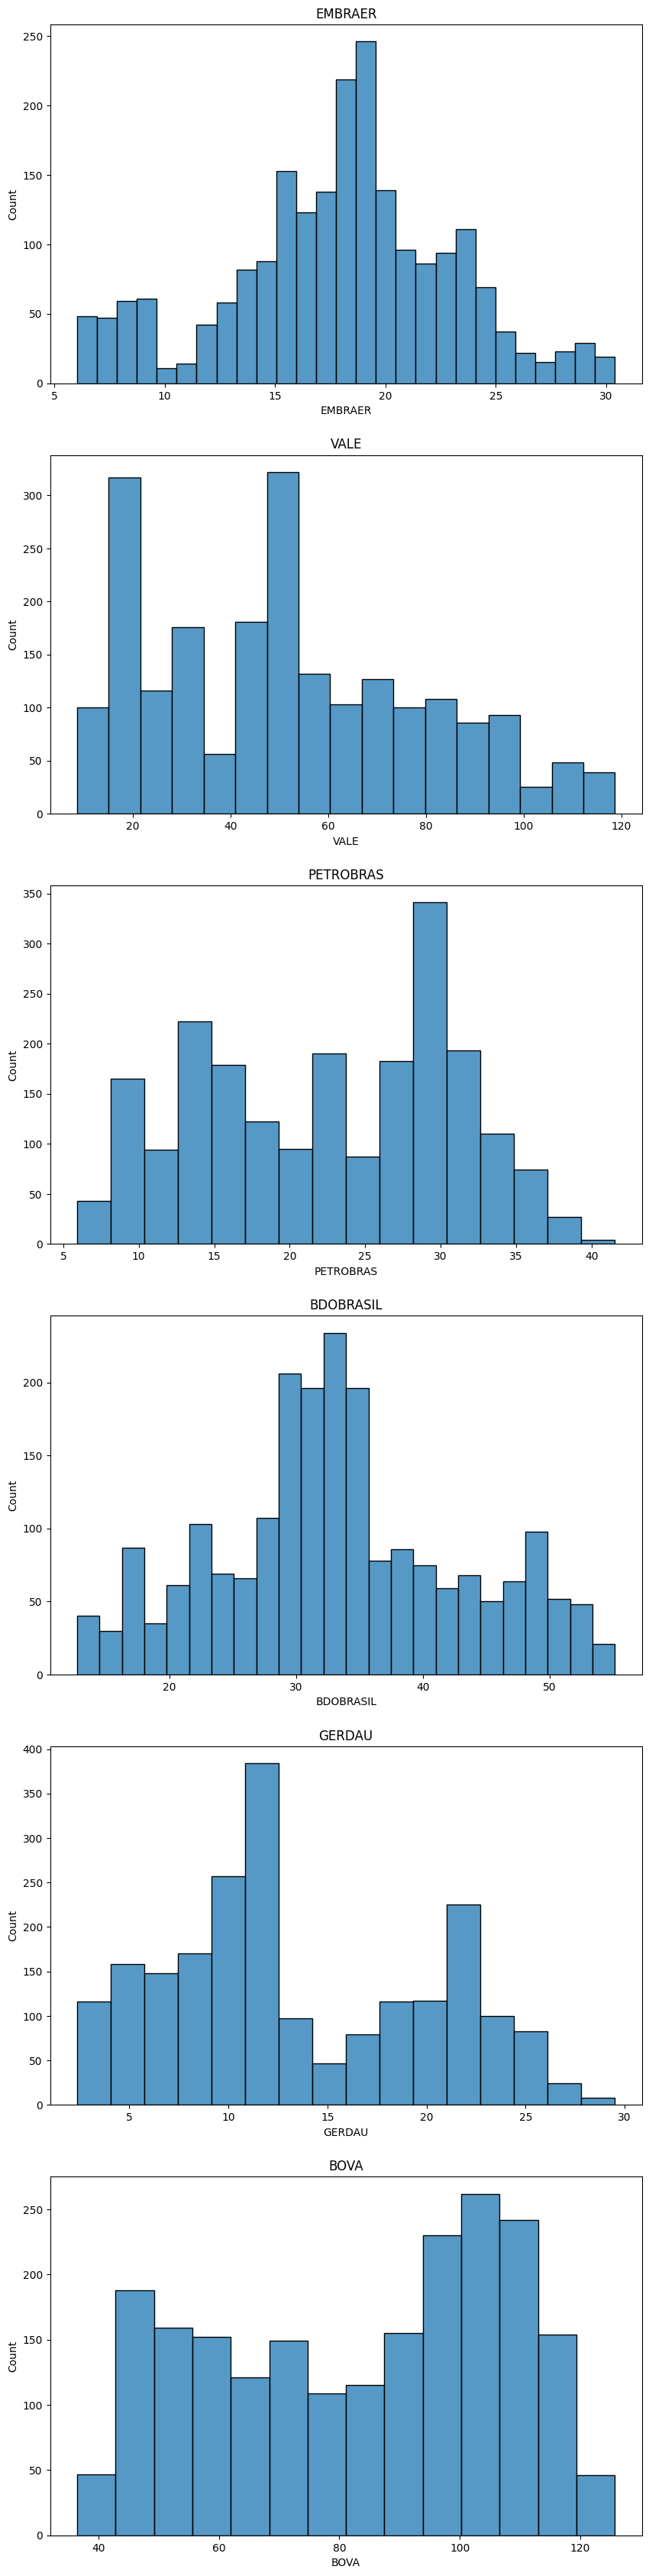

In [33]:
# Gerando histograma para cada variável
plt.figure(figsize = (10,50))
i = 1 # 1 inicia a partir da empresa embraer pois a primeira coluna é a data
for i in np.arange(1, len(bovespa2.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(bovespa2[bovespa2.columns[i]])
  plt.title(bovespa2.columns[i])

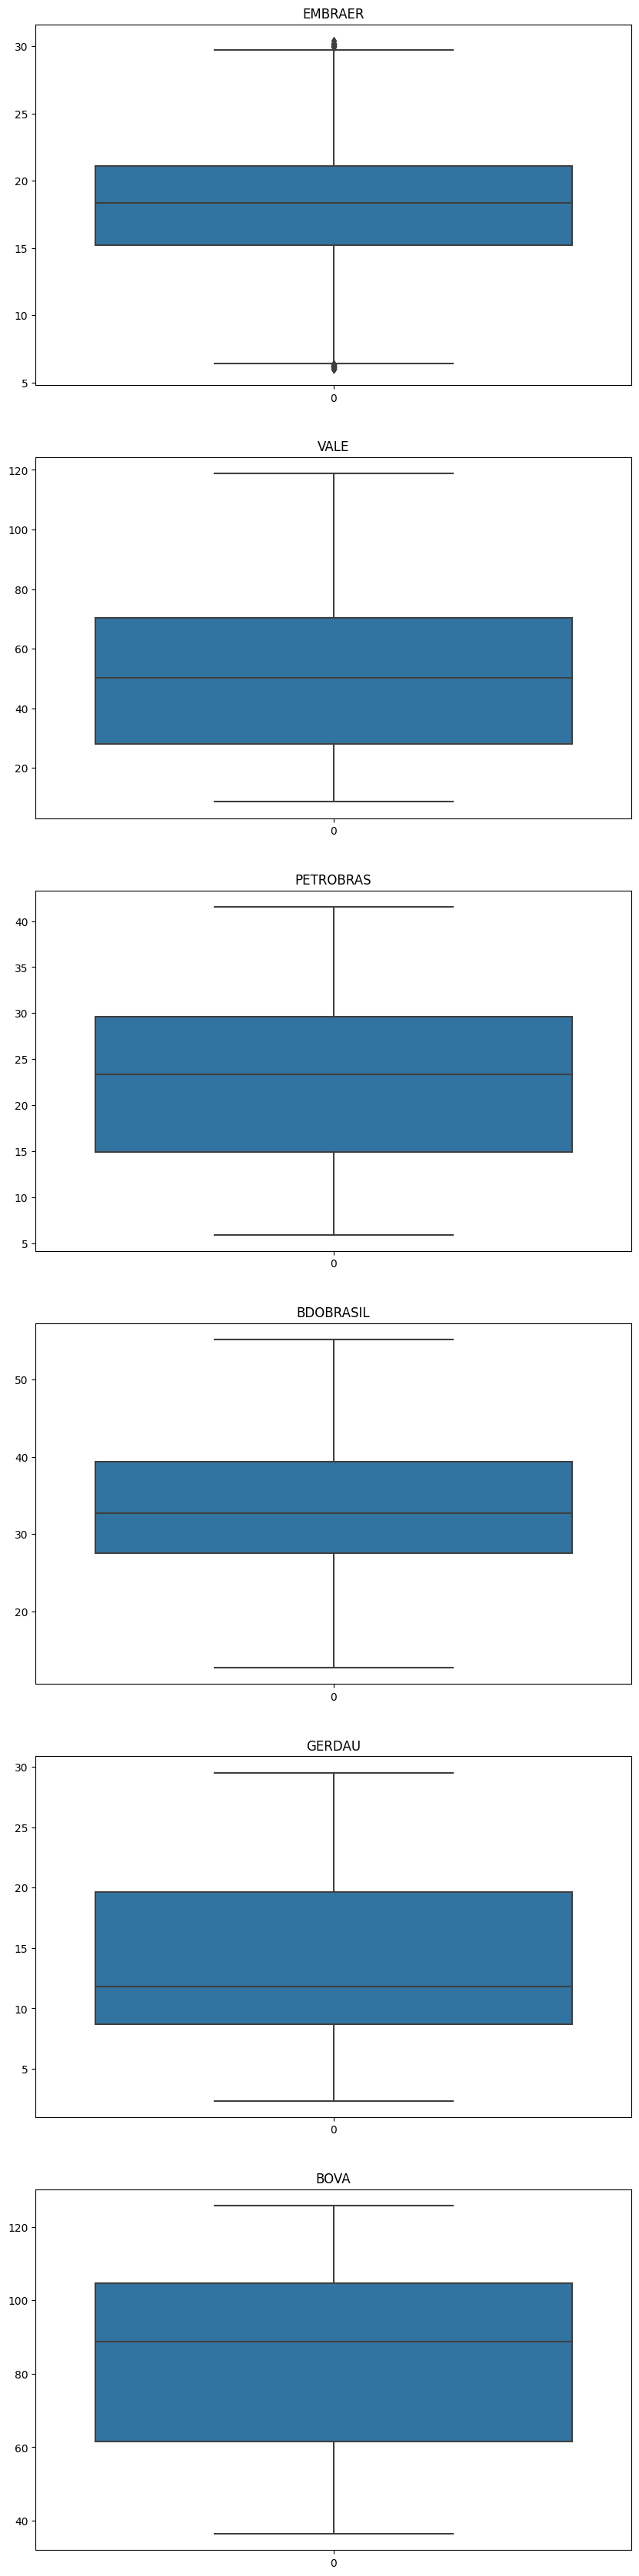

In [34]:
# Gerando boxplot de cada variável
plt.figure(figsize = (10,50))
i = 1 # 1 inicia a partir da empresa embraer pois a primeira coluna é a data
for i in np.arange(1, len(bovespa2.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(bovespa2[bovespa2.columns[i]])
  plt.title(bovespa2.columns[i])

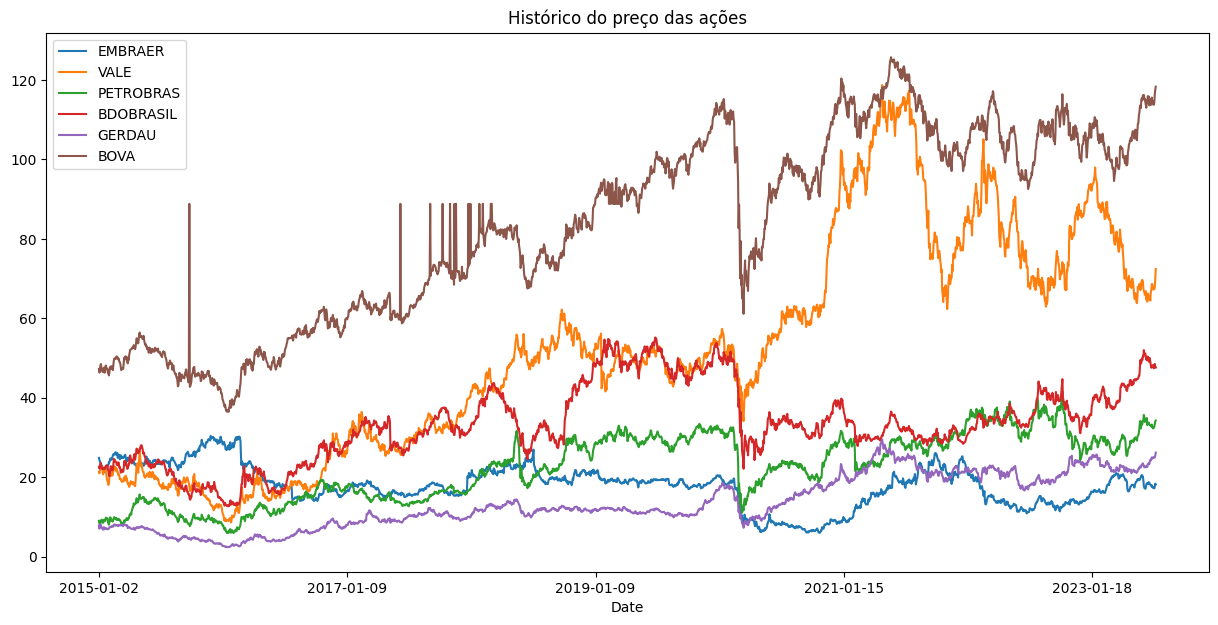

In [35]:
# Observando as ações com gráfico de linhas
bovespa2.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações');

In [36]:
# Calculando crescimento proporcional de cada ação iniciando do mesmo ponto
# Normalizando o dataframe e criando uma copia do original
bovespa_norm = bovespa2.copy()
for i in bovespa_norm.columns[1:]:
  bovespa_norm[i] = bovespa_norm[i] / bovespa_norm[i][0]

In [37]:
# Visualizando
bovespa_norm

,Date,EMBRAER,VALE,PETROBRAS,BDOBRASIL,GERDAU,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.977867,0.984962,0.918889,0.979249,0.894546,0.980110
2,2015-01-06,0.960161,1.024436,0.895556,0.992936,0.963636,0.985612
3,2015-01-07,0.952918,1.062030,0.938889,1.036645,1.033939,1.018832
4,2015-01-08,0.925553,1.073308,1.002222,1.040177,1.001212,1.026449
...,...,...,...,...,...,...,...
2124,2023-07-19,0.699799,3.159774,3.606667,2.094040,3.172909,2.406898
2125,2023-07-20,0.691348,3.166823,3.634444,2.116998,3.183091,2.419382
2126,2023-07-21,0.708652,3.186090,3.701111,2.142163,3.174182,2.462971
2127,2023-07-24,0.739638,3.282425,3.777778,2.100221,3.242909,2.487728


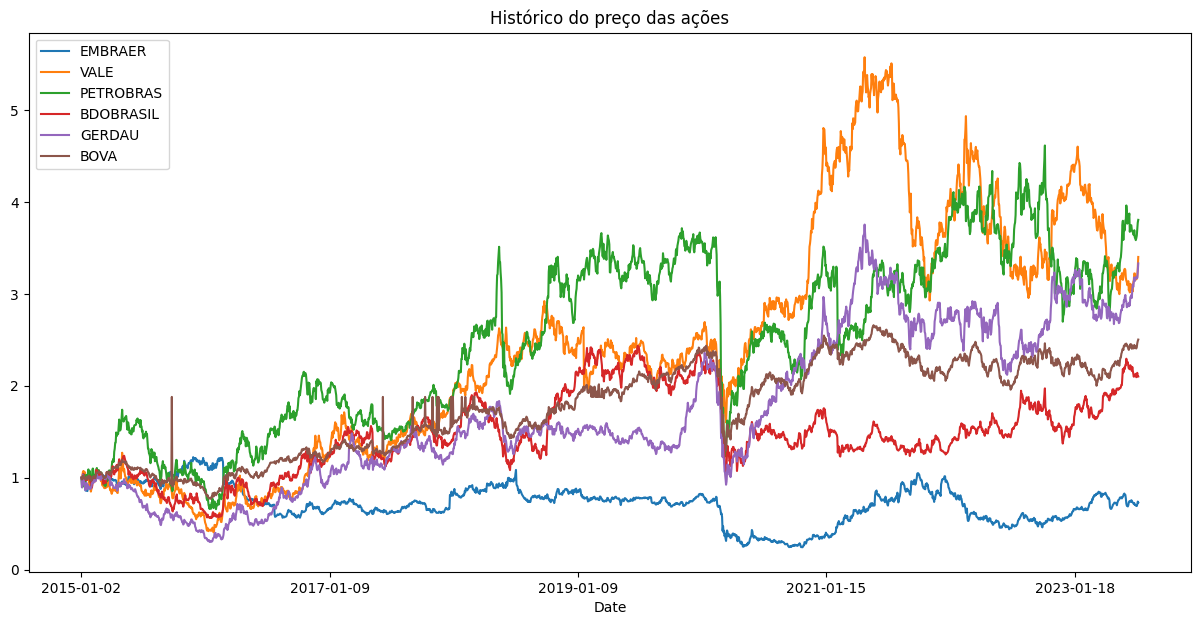

In [38]:
# Observando as ações com gráfico de linhas o dataframe normalizado
bovespa_norm.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações');

In [39]:
# Gerando gráfico dinâmico
figura = px.line(title = 'Histórico do preço das ações')
for i in bovespa2.columns[1:]:
  figura.add_scatter(x = bovespa2['Date'], y = bovespa2[i], name = i)
figura.show()

In [40]:
# Gerando gráfico dinâmico com dataframe normalizado
figura = px.line(title = 'Histórico do preço das ações')
for i in bovespa_norm.columns[1:]:
  figura.add_scatter(x = bovespa_norm['Date'], y = bovespa_norm[i], name = i)
figura.show()

Fazendo previsões de preços utilizando Monte Carlo

In [41]:
# Criando novo dataframe com a coluna BOVA para fazer as previsões
bovespa3 = pd.DataFrame(bovespa2['BOVA'])
bovespa3

,BOVA
0,47.259998
1,46.320000
2,46.580002
3,48.150002
4,48.509998
...,...
2124,113.750000
2125,114.339996
2126,116.400002
2127,117.570000


In [42]:
# Fazendo a normalização dos dados
bovespa3_norm = bovespa3.copy()
for i in bovespa3:
  bovespa3_norm[i] = bovespa3[i] / bovespa3[i][0]
bovespa3_norm

,BOVA
0,1.000000
1,0.980110
2,0.985612
3,1.018832
4,1.026449
...,...
2124,2.406898
2125,2.419382
2126,2.462971
2127,2.487728


In [44]:
# Calculando a taxa de retorno logaritmica
taxa_retorno = np.log(1 + bovespa3_norm.pct_change())
taxa_retorno

,BOVA
0,NaN
1,-0.020090
2,0.005597
3,0.033150
4,0.007449
...,...
2124,-0.001757
2125,0.005173
2126,0.017856
2127,0.010001


In [45]:
# Preenchendo o valor Nan por 0
taxa_retorno.fillna(0, inplace = True)
taxa_retorno

,BOVA
0,0.000000
1,-0.020090
2,0.005597
3,0.033150
4,0.007449
...,...
2124,-0.001757
2125,0.005173
2126,0.017856
2127,0.010001


In [46]:
# Calculando a media diaria
media = taxa_retorno.mean()
media

BOVA    0.000431
dtype: float64

In [47]:
# Calculando a variância
variancia = taxa_retorno.var()
variancia

BOVA    0.001217
dtype: float64

In [48]:
# Primeiro passo da simulação monte carlo
# Calculando o Drift
drift = media - (0.5 * variancia)
drift

BOVA   -0.000177
dtype: float64

In [49]:
# Calculando os retornos diários baseados no cálculo do drift
dias_futuros = 50 # 50 diz quatos dias afrente queremos as previsões
simulacoes = 10 # pode aumentar para melhorar a estimativa

In [50]:
taxa_retorno.describe()

,BOVA
count,2129.000000
mean,0.000431
std,0.034881
min,-0.731355
25%,-0.008010
50%,0.000957
75%,0.009756
max,0.702535


In [51]:
# Calculando desvio padrão
desvio_padrao = taxa_retorno.std()
desvio_padrao

BOVA    0.034881
dtype: float64

In [54]:
# Gerando um conjunto de numeros aleatórios que segue uma distribuição normal
# função ppf faz a geração dos numeros aleatórios
z = stats.norm.ppf(np.random.rand(dias_futuros, simulacoes)) # vai gerar uma matriz

In [55]:
# Observando numero de linhas e colunas
z.shape

(50, 10)

In [56]:
# Observando a matriz z e seus numeros aleatórios
z

array([[-4.56414410e-01, -1.11465373e+00, -7.01124967e-01,
        -1.34576205e+00,  2.59032798e-01, -7.73626897e-01,
         1.30794614e-01, -4.20459384e-01, -2.17579876e+00,
         1.62125711e+00],
       [-1.39643185e-01, -9.37408954e-02,  1.09348119e-01,
        -2.26333898e-01,  1.41249893e-02, -8.64573637e-01,
        -1.52505012e+00,  3.25641974e-01,  1.05217212e+00,
        -3.26081401e-01],
       [ 7.59679765e-01,  3.42463078e-01,  5.88729380e-01,
         6.12297744e-01, -1.49368981e+00, -1.09430109e+00,
         7.49988267e-01,  7.22447437e-01,  1.16616489e+00,
        -8.73013555e-01],
       [ 5.39309339e-01, -8.03615701e-01,  4.25721936e-01,
        -6.69014488e-01, -1.83397224e-01,  1.10290213e-01,
        -6.66795374e-01, -8.62326219e-01,  2.50659637e-02,
         1.39934068e-01],
       [ 2.48279927e-01,  3.42155880e-01, -1.26427970e+00,
        -3.42182564e-01, -8.08581888e-01,  1.18117238e+00,
         8.06036484e-02, -5.08165208e-01, -4.42220330e-01,
        -9.

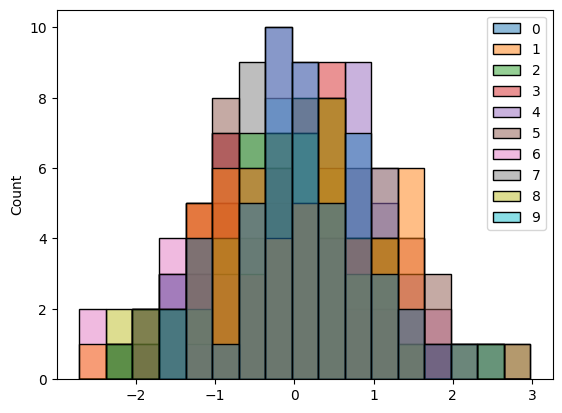

In [57]:
# Gerando um gráfico para garantir que a distribuição é normal
sns.histplot(z);

In [58]:
# Calculando o retorno diário
retorno_diario = np.exp(drift.values + desvio_padrao.values * z)

In [59]:
# Observando shape da variavel retorno_diario
retorno_diario.shape

(50, 10)

In [60]:
# Observando as taxas de retorno diario previstas
retorno_diario

array([[0.98403141, 0.9616953 , 0.97566767, 0.95397393, 1.0088975 ,
        0.97320337, 1.00439469, 0.98526631, 0.92674988, 1.05799341],
       [0.9949646 , 0.99655894, 1.0036436 , 0.9919605 , 1.00031554,
        0.97012095, 0.94802661, 1.01124431, 1.03719895, 0.98851516],
       [1.02667076, 1.01183782, 1.02056699, 1.02140634, 0.94906421,
        0.96237828, 1.02632375, 1.02533828, 1.04133127, 0.96983539],
       [1.01880923, 0.97218589, 1.01478063, 0.97676108, 0.99344725,
        1.00367658, 0.97683669, 0.970197  , 1.00069737, 1.00471493],
       [1.00851917, 1.01182698, 0.95668917, 0.98796014, 0.9720175 ,
        1.04187653, 1.00263781, 0.98225671, 0.98451873, 0.96839345],
       [1.0646929 , 1.01011771, 0.97889797, 1.00478187, 1.03973825,
        1.04689862, 0.97125516, 1.00405955, 1.04441179, 1.09030241],
       [1.01246739, 1.03053215, 1.00445729, 1.01583663, 1.01134833,
        0.9767749 , 0.96282556, 0.93618606, 1.04332209, 0.98227366],
       [1.07342929, 1.04590159, 1.0292257

In [61]:
# Implementação das previsões dos preços futuros
previsoes = np.zeros_like(retorno_diario)

In [62]:
# Observand o shape
previsoes.shape

(50, 10)

In [63]:
# Observando os valores da variavel
previsoes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [64]:
# Colocando na primeira linha os ultimos valores de preço das ações da ultima data da base de dados
# Buscando o ultimo preço da bovespa
bovespa3.iloc[-1]

BOVA    118.339996
Name: 2128, dtype: float64

In [67]:
# Fazendo o procedimento
previsoes[0] = bovespa3.iloc[-1]
previsoes

array([[118.33999634, 118.33999634, 118.33999634, 118.33999634,
        118.33999634, 118.33999634, 118.33999634, 118.33999634,
        118.33999634, 118.33999634],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  

In [68]:
for i in range(1, dias_futuros):
  previsoes[i] = previsoes[i - 1] * retorno_diario[i]

In [69]:
# Visualizando todas as previsões
previsoes

array([[118.33999634, 118.33999634, 118.33999634, 118.33999634,
        118.33999634, 118.33999634, 118.33999634, 118.33999634,
        118.33999634, 118.33999634],
       [117.74410696, 117.93278095, 118.77118028, 117.38860166,
        118.37733717, 114.8041092 , 112.18946561, 119.67064751,
        122.74212028, 116.98088032],
       [120.88443184, 119.32884767, 121.21394652, 119.90146189,
        112.3476938 , 110.48498082, 115.14271334, 122.70289614,
        127.81520826, 113.45219772],
       [123.15817473, 116.00982223, 123.00556527, 117.11508147,
        111.61150752, 110.89118818, 112.47562695, 119.04598163,
        127.90434219, 113.9871174 ],
       [124.20737958, 117.38186752, 117.67809228, 115.70503208,
        108.48833834, 115.53492627, 112.77231671, 116.93371379,
        125.92422004, 110.38437824],
       [132.24271542, 118.56950284, 115.19484601, 116.25831812,
        112.79947502, 120.95335526, 109.53069427, 117.40841203,
        131.51674015, 120.35235332],
       [13

In [70]:
# Fazendo a matriz transposta para o melhor entendimento do grafico
previsoes.T

array([[118.33999634, 117.74410696, 120.88443184, 123.15817473,
        124.20737958, 132.24271542, 133.89143688, 143.72298977,
        146.95584248, 146.79778847, 153.78167936, 156.55541998,
        157.04325317, 158.44783878, 161.01258329, 160.27693456,
        168.35586162, 169.74224319, 175.43483244, 174.12620145,
        165.33303759, 163.39982945, 155.66040527, 154.31171239,
        161.16837811, 164.76437702, 161.01878046, 155.77166438,
        155.36190716, 160.94662855, 163.04533941, 167.25843731,
        161.04942778, 166.56026354, 159.10829998, 160.44748266,
        166.82853906, 163.77447699, 161.29165312, 157.54914649,
        156.85594002, 157.60823523, 151.15610794, 149.36558345,
        143.48889013, 142.0499845 , 142.9108121 , 141.59159395,
        145.36442084, 145.74810289],
       [118.33999634, 117.93278095, 119.32884767, 116.00982223,
        117.38186752, 118.56950284, 122.18968413, 127.79838467,
        134.10582962, 128.36321697, 129.86140635, 131.80240344,
   

In [71]:
# Gerando grafico das previsões
figura = px.line(title = 'Previsões do preço das ações')
for i in range(len(previsoes.T)):
  figura.add_scatter(y = previsoes.T[i], name = i) # só temos eixo y
figura.show()

In [76]:
# Comparando as previsões com os preços reais
# Criando nova variavel
bova = bovespa3 = yf.download("BOVA11.SA", start='2020-11-04',end='2023-07-25')['Close']
bova

[*********************100%***********************]  1 of 1 completed


Date
2020-11-04     94.160004
2020-11-05     96.949997
2020-11-06     97.190002
2020-11-09     99.500000
2020-11-10    101.000000
                 ...    
2023-07-18    113.949997
2023-07-19    113.750000
2023-07-20    114.339996
2023-07-21    116.400002
2023-07-24    117.570000
Name: Close, Length: 675, dtype: float64

In [84]:
# Salvado dataset
bova.to_csv('bova2.csv')

In [85]:
# Carregando novo dataset
bova2 = pd.read_csv('/content/bova2.csv')
bova2

,Date,Close
0,2020-11-04,94.160004
1,2020-11-05,96.949997
2,2020-11-06,97.190002
3,2020-11-09,99.500000
4,2020-11-10,101.000000
...,...,...
670,2023-07-18,113.949997
671,2023-07-19,113.750000
672,2023-07-20,114.339996
673,2023-07-21,116.400002


In [87]:
# Comparando os preços reais com as simulações
simulacao1 = previsoes.T[0][0:len(bova2)]
simulacao1

array([118.33999634, 117.74410696, 120.88443184, 123.15817473,
       124.20737958, 132.24271542, 133.89143688, 143.72298977,
       146.95584248, 146.79778847, 153.78167936, 156.55541998,
       157.04325317, 158.44783878, 161.01258329, 160.27693456,
       168.35586162, 169.74224319, 175.43483244, 174.12620145,
       165.33303759, 163.39982945, 155.66040527, 154.31171239,
       161.16837811, 164.76437702, 161.01878046, 155.77166438,
       155.36190716, 160.94662855, 163.04533941, 167.25843731,
       161.04942778, 166.56026354, 159.10829998, 160.44748266,
       166.82853906, 163.77447699, 161.29165312, 157.54914649,
       156.85594002, 157.60823523, 151.15610794, 149.36558345,
       143.48889013, 142.0499845 , 142.9108121 , 141.59159395,
       145.36442084, 145.74810289])